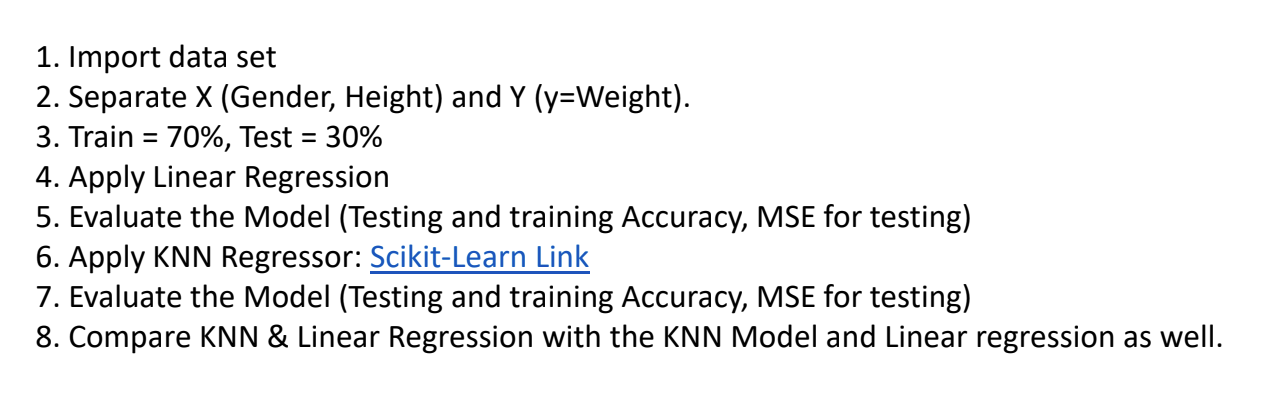

In [49]:
import numpy as np
import pandas as pd

 # `1. Import data set`

> Indented block



In [50]:
weight_height_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML-crs/weight-height.csv')

In [51]:
weight_height_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [52]:
df = weight_height_data
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [53]:
df.rename(columns={'Gender':'gender','Height':'height','Weight':'weight'},inplace=True)
df


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


# `2. Separate X (Gender, Height) and Y (y=Weight).`




In [54]:
X = df[['gender','height']]
Y = df['weight']

In [55]:
X

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
8550,Female,60.483946
8551,Female,63.423372
8552,Female,65.584057
8553,Female,67.429971


In [56]:
Y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: weight, Length: 8555, dtype: float64

# `3. Train = 70%, Test = 30%`

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [59]:
X_train

,gender,height
553,Male,67.594031
1397,Male,71.601697
7934,Female,62.625985
8367,Female,66.136131
3320,Male,71.843308
...,...,...
5734,Female,63.349988
5191,Female,58.861625
5390,Female,64.325406
860,Male,69.074492


In [60]:
X_test

,gender,height
6006,Female,64.846644
1197,Male,68.886367
2862,Male,70.963369
6497,Female,62.737189
2860,Male,69.578030
...,...,...
184,Male,71.935887
2988,Male,67.616383
6048,Female,58.213614
420,Male,69.689795


# 4. `Apply Linear Regression`

In [61]:
from sklearn.linear_model import LinearRegression


In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [63]:
X_train['gender_encoded'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender_encoded'] = label_encoder.transform(X_test['gender'])

In [64]:
X_train


,gender,height,gender_encoded
553,Male,67.594031,1
1397,Male,71.601697,1
7934,Female,62.625985,0
8367,Female,66.136131,0
3320,Male,71.843308,1
...,...,...,...
5734,Female,63.349988,0
5191,Female,58.861625,0
5390,Female,64.325406,0
860,Male,69.074492,1


In [65]:
X_test

,gender,height,gender_encoded
6006,Female,64.846644,0
1197,Male,68.886367,1
2862,Male,70.963369,1
6497,Female,62.737189,0
2860,Male,69.578030,1
...,...,...,...
184,Male,71.935887,1
2988,Male,67.616383,1
6048,Female,58.213614,0
420,Male,69.689795,1


In [66]:
X_train_encoded = X_train.drop('gender', axis=1)
X_test_encoded = X_test.drop('gender', axis=1)

In [67]:
model = LinearRegression()
model.fit(X_train_encoded, Y_train)

LinearRegression()

In [68]:
predictions = model.predict(X_test_encoded)
predictions

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

# 5. Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [69]:
from sklearn.metrics import mean_squared_error


In [70]:
mse = mean_squared_error(Y_test, predictions)
mse

96.83734437830611

# 6. Apply KNN Regressor:

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [73]:
knn_regressor.fit(X_train_encoded, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [74]:
predictions = knn_regressor.predict(X_test_encoded)
predictions

array([142.5130416 , 173.90630823, 184.6686197 , ...,  95.44597987,
       182.99507227, 147.37662317])

# 7. Evaluate the Model (Testing and training Accuracy, MSE for testing)

In [75]:
mse2 = mean_squared_error(Y_test, predictions)
mse2

135.8684592453893

In [80]:
print("Using Linear Regression , mse is " , mse)
print("Using KNN , mse2 is " , mse2)

Using Linear Regression , mse is  96.83734437830611
Using KNN , mse2 is  135.8684592453893


In [79]:
print("as mse<mse2 , we can say mse is better . means linear regression is better")

as mse<mse2 , we can say mse is better . means linear regression is better


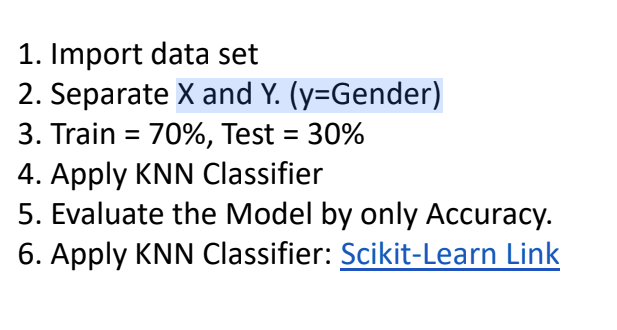

In [81]:
X2 = df[['height', 'weight']]
Y2 = df['gender']

In [93]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [94]:
X2_train.head()

,height,weight
553,67.594031,186.751417
1397,71.601697,211.031652
7934,62.625985,143.768451
8367,66.136131,151.814648
3320,71.843308,196.505814


In [95]:
Y2_train.head()

553       Male
1397      Male
7934    Female
8367    Female
3320      Male
Name: gender, dtype: object

In [96]:
X2_test.head()

,height,weight
6006,64.846644,149.668369
1197,68.886367,197.642244
2862,70.963369,178.551191
6497,62.737189,141.343095
2860,69.578030,195.322675


In [97]:
Y2_test.head()

6006    Female
1197      Male
2862      Male
6497    Female
2860      Male
Name: gender, dtype: object

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X2_train, Y2_train)


KNeighborsClassifier(n_neighbors=3)

In [88]:
knn_predictions = knn_classifier.predict(X2_test)
knn_predictions

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [110]:
he=64.846644
we=	149.668369
new_data = pd.DataFrame({'height': [he],'weight':[we]})


In [111]:
normal_prediction = knn_classifier.predict(new_data[['height','weight']])
normal_prediction

array(['Female'], dtype=object)

In [92]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y2_test, knn_predictions)
accuracy

0.901441371250487